In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, ticker

from utils.plot import set_axis_ticks

In [2]:
summary_file_dir = 'results'
summary_dfs = [
    pd.read_csv(f'{os.path.join(summary_file_dir, filename)}')
    for filename in os.listdir(summary_file_dir)
    if filename.endswith('-summary.csv')
]

full_orders = range(299, 339)

stacked_summary_df = pd.concat(summary_dfs, ignore_index=True)

# for col in [
#     'src_img_fits', 'src_img_fits_spec', 'src_img_fits_combined_img',
#     *[f'extn_range_order{order}' for order in full_orders]
# ]:
#     stacked_summary_df[col] = stacked_summary_df[col].apply(json.loads)
stacked_summary_df

,group,object,extracted_spec_fits,combined_img_fits,flat_fits,wvl_cal_fits,src_img_fits,is_src_img_fits_log_consistent,src_img_fits_spec,src_img_fits_combined_img,...,snr_mean_order334,snr_std_order334,snr_mean_order335,snr_std_order335,snr_mean_order336,snr_std_order336,snr_mean_order337,snr_std_order337,snr_mean_order338,snr_std_order338
0,LP_2442_gp1,15a1cd81cf4,combined_spectra1-4.fits,combined1-4.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,"[""icm.2023A023.230617.fname.00001.a.fits"", ""ic...",True,"[""icm.2023A023.230617.fname.00001.a.fits"", ""ic...","[""icm.2023A023.230617.fname.00001.a.fits"", ""ic...",...,34.775701,14.104829,34.226562,13.940857,33.768930,13.781376,30.909235,13.285445,23.041700,13.759404
1,LP_2442_gp1,175e78fa2fa,combined_spectra12-15.fits,combined12-15.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,"[""icm.2023A023.230617.fname.00012.a.fits"", ""ic...",True,"[""icm.2023A023.230617.fname.00012.a.fits"", ""ic...","[""icm.2023A023.230617.fname.00012.a.fits"", ""ic...",...,30.921005,12.475281,30.277340,12.482233,29.321020,12.308373,26.695946,12.128581,19.664008,12.876697
2,Telluric_STD,TelluricSTD,combined_spectra16-18.fits,combined16-18.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,"[""icm.2023A023.230617.fname.00016.a.fits"", ""ic...",False,[],"[""icm.2023A023.230617.fname.00016.a.fits"", ""ic...",...,140.006293,43.559576,140.783502,43.248988,139.467382,43.362459,137.230834,44.017007,121.211371,53.154971
3,LP_2442_gp1,15a1cd81cf4,combined_spectra19-22.fits,combined19-22.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,"[""icm.2023A023.230617.fname.00019.a.fits"", ""ic...",True,"[""icm.2023A023.230617.fname.00019.a.fits"", ""ic...","[""icm.2023A023.230617.fname.00019.a.fits"", ""ic...",...,36.589100,14.008386,35.882036,13.974871,35.106861,13.888245,32.391217,13.867980,24.545012,14.338472
4,LP_2442_gp1,16709cdbc1c,combined_spectra23-26.fits,combined23-26.fits,fname5-9(-24).fits,wavecal10-11(-24).fits,"[""icm.2023A023.230617.fname.00023.a.fits"", ""ic...",True,"[""icm.2023A023.230617.fname.00023.a.fits"", ""ic...","[""icm.2023A023.230617.fname.00023.a.fits"", ""ic...",...,29.260090,11.958954,28.492809,12.089060,27.650713,11.798599,24.909563,11.874603,17.999666,12.512752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,LP_2442_gp2,2aff1d5e562,combined_spectra104-106.fits,combined104-106.fits,flat97-101.fits,wavecal102-103.fits,"[""icm.2023A023.230615.fname.00104.a.fits"", ""ic...",False,[],"[""icm.2023A023.230615.fname.00104.a.fits"", ""ic...",...,30.926764,13.382482,30.251338,12.637977,29.239004,12.255997,26.470239,11.508358,20.115205,11.776717
59,LP_2442_gp2,246df9c59d2,combined_spectra107-110.fits,combined107-110.fits,flat97-101.fits,wavecal102-103.fits,"[""icm.2023A023.230615.fname.00107.a.fits"", ""ic...",True,"[""icm.2023A023.230615.fname.00107.a.fits"", ""ic...","[""icm.2023A023.230615.fname.00107.a.fits"", ""ic...",...,34.931801,14.947338,34.126838,14.149446,33.089352,14.043686,29.804211,12.684042,22.501575,13.547123
60,LP_2442_gp2,24247745ed7,combined_spectra111-114.fits,combined111-114.fits,flat97-101.fits,wavecal102-103.fits,"[""icm.2023A023.230615.fname.00111.a.fits"", ""ic...",True,"[""icm.2023A023.230615.fname.00111.a.fits"", ""ic...","[""icm.2023A023.230615.fname.00111.a.fits"", ""ic...",...,31.168269,13.915187,30.232908,13.361644,29.028372,12.729345,25.570450,11.682334,17.507675,11.864272
61,Telluric_STD,TelluricSTD,combined_spectra115-118.fits,combined115-118.fits,flat97-101.fits,wavecal102-103.fits,"[""icm.2023A023.230615.fname.00115.a.fits"", ""ic...",True,"[""icm.2023A023.230615.fname.00115.a.fits"", ""ic...","[""icm.2023A023.230615.fname.00115.a.fits"", ""ic...",...,148.186760,47.098587,149.853847,46.399846,148.385559,45.899020,146.159010,46.062671,136.253541,48.558877


In [3]:
# statistics
print(f'{stacked_summary_df["object"].nunique()} unique objects observed')
for group, group_df in stacked_summary_df.groupby('group'):
    print(''.center(60, '-'))
    if group not in ['RV_STD', 'Telluric_STD']:
        print(f'{group} has {group_df["object"].nunique()} unique objects observed')
        # find and print duplicate observations
        duplicates = group_df[group_df.duplicated(subset=['object'], keep=False)]
        if not duplicates.empty:
            print(f'Duplicate observations in {group}:')
            for obj, dup_df in duplicates.groupby('object'):
                print(f'  {obj}: {dup_df["obs_date"].tolist()}')
    else:
        print(f'{group} has {len(group_df)} observations')

51 unique objects observed
------------------------------------------------------------
LP_2442_gp1 has 10 unique objects observed
Duplicate observations in LP_2442_gp1:
  15a1cd81cf4: [230617, 230617]
------------------------------------------------------------
LP_2442_gp2 has 16 unique objects observed
------------------------------------------------------------
LP_2442_gp3 has 5 unique objects observed
------------------------------------------------------------
LP_2442_gp4 has 13 unique objects observed
Duplicate observations in LP_2442_gp4:
  44c373dfa50: [230617, 230614]
  466024fa95e: [230617, 230614]
------------------------------------------------------------
LP_2442_gp5 has 5 unique objects observed
Duplicate observations in LP_2442_gp5:
  5a414c74fee: [230614, 230615]
------------------------------------------------------------
RV_STD has 2 observations
------------------------------------------------------------
Telluric_STD has 8 observations


# Visualise SNR distributions

In [4]:
plot_colour_dict = {
    'LP_2442_gp1': 'tab:blue',
    'LP_2442_gp2': 'tab:orange',
    'LP_2442_gp3': 'tab:green',
    'LP_2442_gp4': 'tab:red',
    'LP_2442_gp5': 'tab:purple',
    'RV_STD': 'tab:cyan',
    'Telluric_STD': 'tab:brown',
}

plot_marker_dict = {
    'LP_2442_gp1': 'o',
    'LP_2442_gp2': 'o',
    'LP_2442_gp3': 'o',
    'LP_2442_gp4': 'o',
    'LP_2442_gp5': 'o',
    'RV_STD': '^',
    'Telluric_STD': 'x',
}

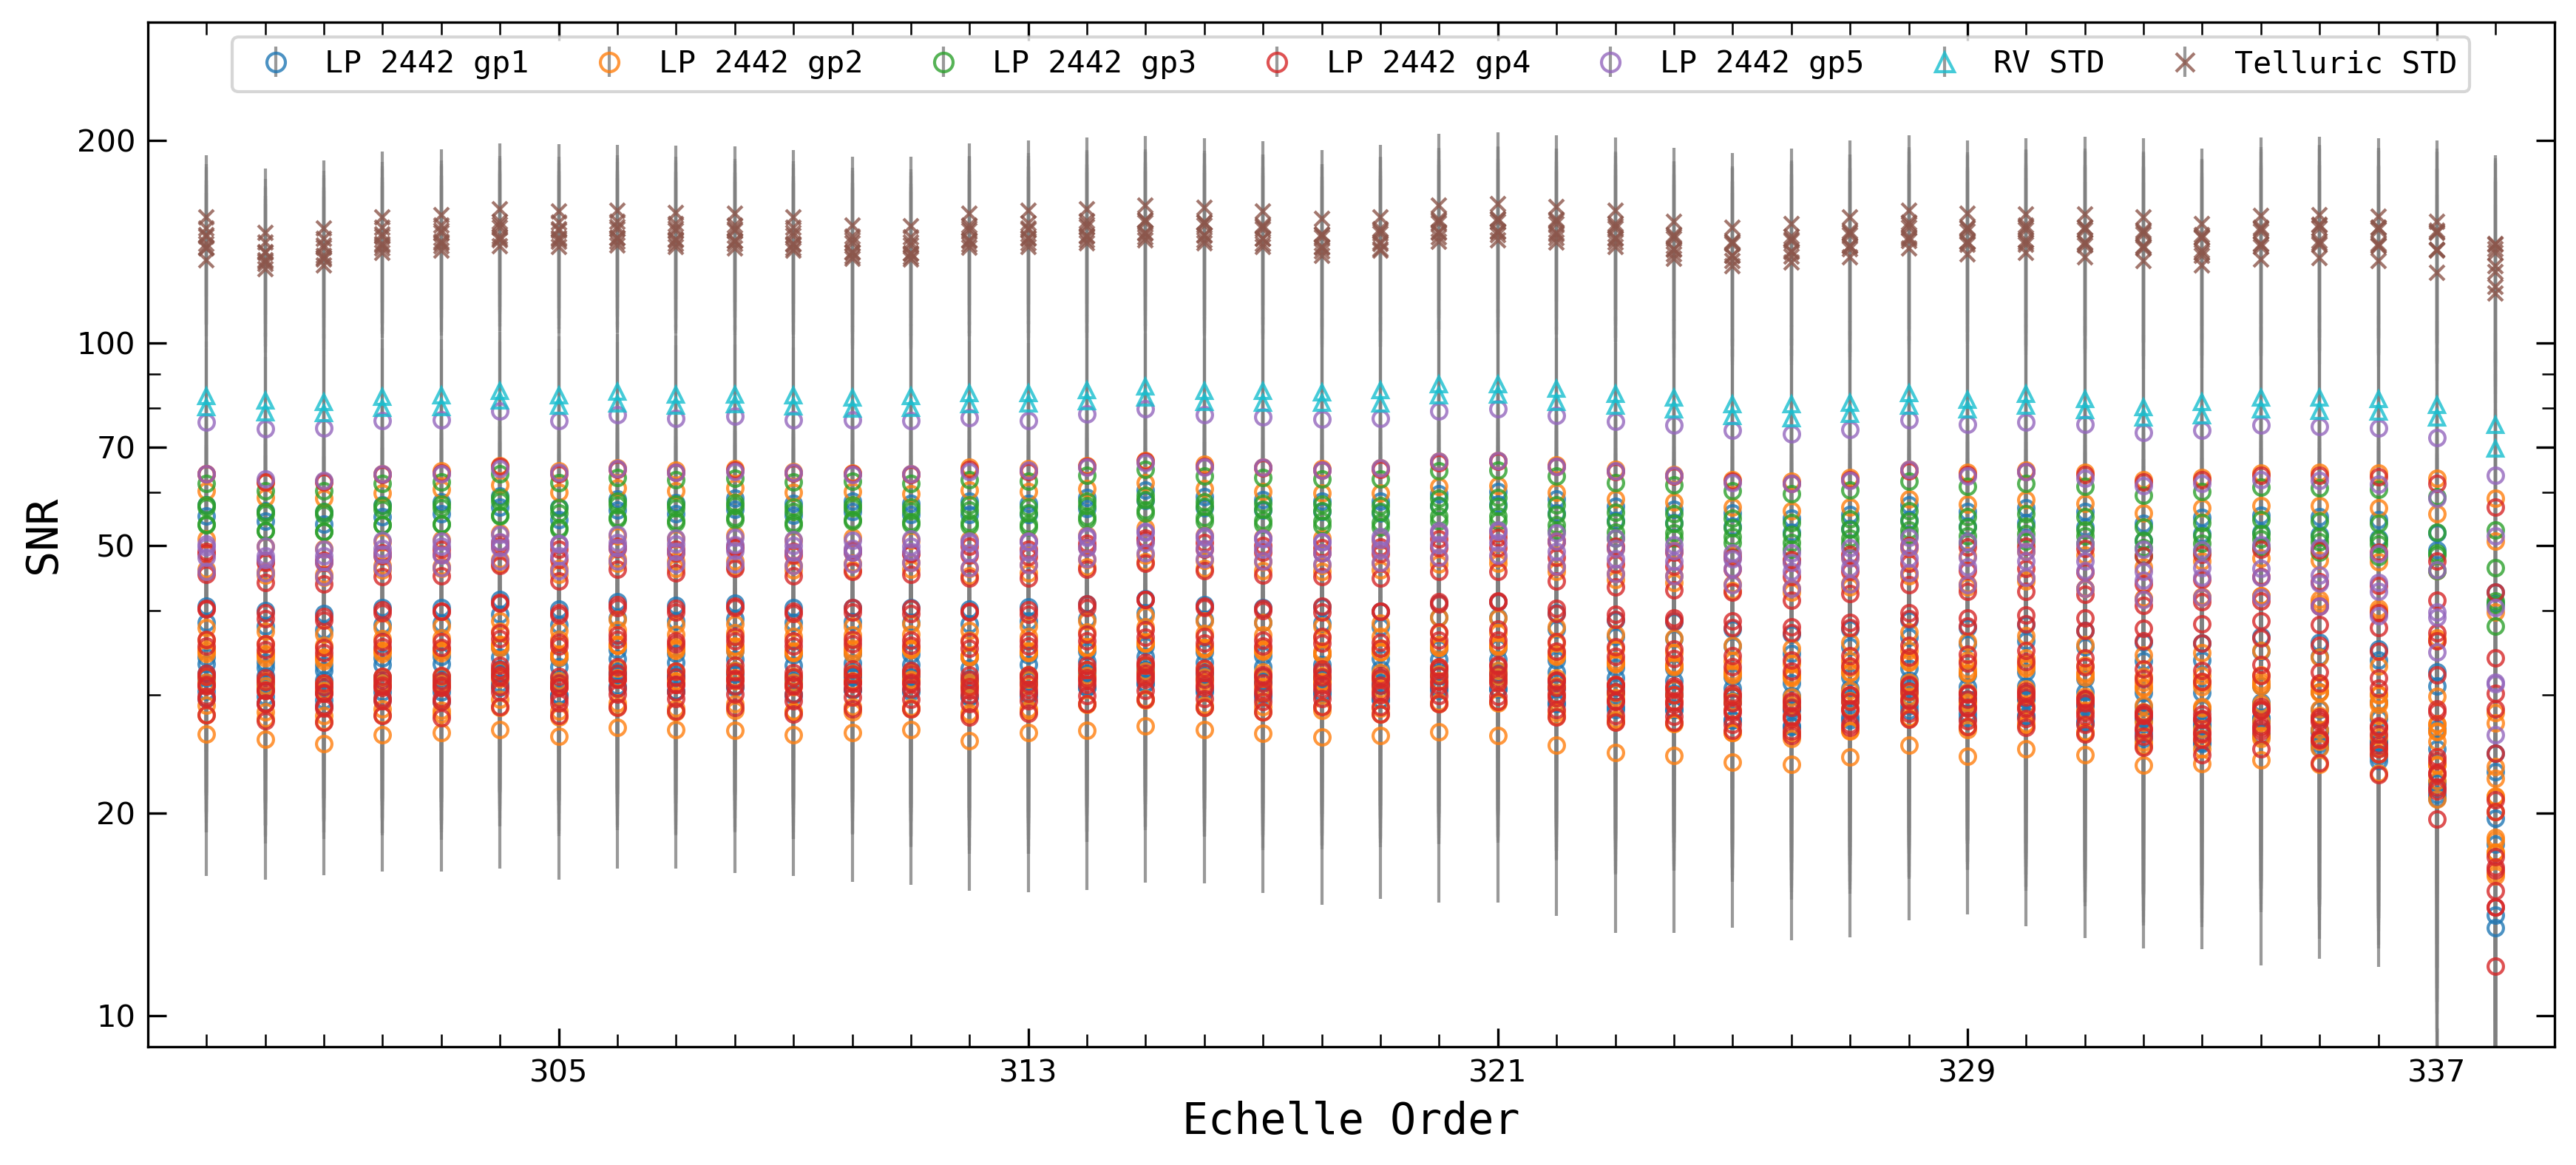

In [5]:
fig, axis = plt.subplots(1, 1, figsize=(14, 6), dpi=300)

set_axis_ticks(axis)
# plot the SNR by order, using the same colour for the same group
for group, group_df in stacked_summary_df.groupby('group'):
    for order in full_orders:
        snr = group_df[f'snr_mean_order{order}']
        snr_err = group_df[f'snr_std_order{order}']
        axis.errorbar(
            np.full_like(snr, order), snr, yerr=snr_err,
            fmt=plot_marker_dict[group],
            mfc='none', mec=plot_colour_dict[group], alpha=.8, mew=1, ms=5,
            ecolor='gray', elinewidth=1, capsize=0,
            label=group.replace('_', ' ')
        )

axis.legend(
    *[*zip(*{l: h for h, l in zip(*axis.get_legend_handles_labels())}.items())][::-1],
    ncol=stacked_summary_df['group'].nunique(), loc='upper center',
    prop={'family': 'monospace', 'size': 10}, markerscale=1.2,
    columnspacing=1.6, handletextpad=.6
)

axis.set_xlabel('Echelle Order', font='monospace', fontsize=14)
axis.set_xlim(298, 339)
axis.xaxis.set_major_locator(plt.MultipleLocator(8, offset=1))
axis.xaxis.set_minor_locator(plt.MultipleLocator(1))

axis.set_ylabel('SNR', font='monospace', fontsize=14)
axis.set_ylim(9, 300)
axis.set_yscale('log')
axis.set_yticks([10, 20, 50, 70, 100, 200])
axis.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
